In [1]:
# import the modules
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
#import lightgbm as lgb

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
#from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [22]:
# Code starts here
train = pd.read_csv('train.csv')
train.head()

train.isnull().sum()

train = train.drop(['Id','Unnamed: 0'],1)
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()  #to find if null columns if any when the dataframe is big

train.describe()
train.corr()

#plt.scatter(x=train['attr560'], y=train['attr1089'])

attr0     attr1     attr2     attr3     attr4     attr5  \
attr0     1.000000  0.389267 -0.233585 -0.217761 -0.103211 -0.078362   
attr1     0.389267  1.000000  0.370898 -0.224030 -0.215586 -0.115224   
attr2    -0.233585  0.370898  1.000000  0.398989 -0.264422 -0.241783   
attr3    -0.217761 -0.224030  0.398989  1.000000  0.340332 -0.257823   
attr4    -0.103211 -0.215586 -0.264422  0.340332  1.000000  0.385862   
...            ...       ...       ...       ...       ...       ...   
attr1085 -0.089467 -0.088835 -0.074202 -0.047766 -0.051479 -0.023579   
attr1086 -0.056839 -0.037690 -0.025698 -0.032313 -0.030409 -0.010903   
attr1087 -0.023512 -0.052874 -0.094396 -0.102488 -0.084117 -0.064667   
attr1088 -0.055519 -0.023814 -0.016172 -0.018061 -0.036636 -0.031673   
attr1089  0.017809 -0.000612 -0.023844 -0.052945 -0.049760 -0.076218   

             attr6     attr7     attr8     attr9    attr10    attr11  \
attr0    -0.074286 -0.033523 -0.037672 -0.026824  0.853539  0.256960   
attr1    -0.092100 -0.039139  0.014999  0.011604  0.460639  0.845959   
attr2    -0.124217 -0.044310 -0.005901  0.019383 -0.113120  0.423464   
attr3    -0.215919 -0.080193 -0.049891 -0.025663 -0.177451 -0.089471   
attr4    -0.222478 -0.167368 -0.070068 -0.060688 -0.093689 -0.152647   
...            ...       ...       ...       ...       ...       ...   
attr1085  0.039214  0.057450  0.057515  0.071295 -0.099977 -0.079150   
attr1086 -0.003955  0.003836  0.034954  0.068280 -0.044533 -0.027020   
attr1087 -0.068540 -0.076303 -0.040277  0.016069 -0.004907 -0.062677   
attr1088 -0.001324  0.018151  0.038173  0.068848 -0.038754 -0.019017   
attr1089 -0.121935 -0.107175 -0.051969  0.014472  0.046156 -0.004862   

            attr12    attr13    attr14    attr15    attr16    attr17  \
attr0    -0.290127 -0.254663 -0.090829 -0.011784 -0.038081 -0.045052   
attr1     0.204363 -0.254494 -0.196119 -0.059433 -0.073306 -0.046914   
attr2     0.827392  0.277095 -0.263303 -0.219083 -0.134144 -0.051886   
attr3     0.443403  0.796321  0.242880 -0.263279 -0.237410 -0.066420   
attr4    -0.125484  0.339972  0.827829  0.272776 -0.198002 -0.133731   
...            ...       ...       ...       ...       ...       ...   
attr1085  0.018601  0.077529 -0.033852 -0.122894 -0.025839  0.071209   
attr1086 -0.027014 -0.045373 -0.054516 -0.008063  0.020026  0.017591   
attr1087 -0.135990 -0.147388 -0.108651 -0.034282 -0.036576 -0.078779   
attr1088  0.011867  0.033652 -0.033183 -0.083829 -0.034822  0.026706   
attr1089 -0.131403 -0.181603 -0.055354  0.060387 -0.041604 -0.144604   

            attr18    attr19    attr20    attr21    attr22    attr23  \
attr0    -0.027806 -0.008668  0.564028  0.093190 -0.238647 -0.194716   
attr1     0.010775  0.005023  0.421179  0.523727  0.029325 -0.185963   
attr2    -0.004174  0.010464  0.026978  0.376533  0.454684  0.130709   
attr3    -0.030807 -0.016354 -0.080018  0.063794  0.321699  0.426816   
attr4    -0.066080 -0.051281 -0.052690 -0.052382  0.002976  0.213740   
...            ...       ...       ...       ...       ...       ...   
attr1085  0.069813  0.076505 -0.096823 -0.003926  0.185938  0.199227   
attr1086  0.042765  0.085320 -0.014304 -0.027560 -0.025843 -0.015619   
attr1087 -0.048336  0.036870  0.014860 -0.102067 -0.158397 -0.119076   
attr1088  0.045486  0.081487 -0.014250  0.002026  0.081446  0.106066   
attr1089 -0.073634  0.024469  0.067171 -0.095058 -0.336984 -0.300129   

            attr24    attr25    attr26    attr27    attr28    attr29  \
attr0    -0.039777  0.052975  0.021422 -0.056195 -0.037033 -0.005329   
attr1    -0.098589  0.016508 -0.023281 -0.068064 -0.025789 -0.004308   
attr2    -0.147507 -0.114215 -0.101068 -0.053154 -0.016933  0.009957   
attr3     0.129664 -0.146812 -0.179565 -0.042634 -0.002492 -0.004435   
attr4     0.447627  0.127486 -0.093105 -0.068908 -0.036064 -0.041008   
...            ...       ...       ...       ...       ...       ...   
attr1085 -0.104302 -0.250342 -0.132542  0.070793 

In [24]:
train.head()

,attr0,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30,attr31,attr32,attr33,attr34,attr35,attr36,attr37,attr38,attr39,attr40,attr41,attr42,attr43,attr44,attr45,attr46,attr47,attr48,attr49,attr50,attr51,attr52,attr53,attr54,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,attr65,attr66,attr67,attr68,attr69,attr70,attr71,attr72,attr73,attr74,attr75,attr76,attr77,attr78,attr79,attr80,attr81,attr82,attr83,attr84,attr85,attr86,attr87,attr88,attr89,attr90,attr91,attr92,attr93,attr94,attr95,attr96,attr97,attr98,attr99,attr100,attr101,attr102,attr103,attr104,attr105,attr106,attr107,attr108,attr109,attr110,attr111,attr112,attr113,attr114,attr115,attr116,attr117,attr118,attr119,attr120,attr121,attr122,attr123,attr124,attr125,attr126,attr127,attr128,attr129,attr130,attr131,attr132,attr133,attr134,attr135,attr136,attr137,attr138,attr139,attr140,attr141,attr142,attr143,attr144,attr145,attr146,attr147,attr148,attr149,attr150,attr151,attr152,attr153,attr154,attr155,attr156,attr157,attr158,attr159,attr160,attr161,attr162,attr163,attr164,attr165,attr166,attr167,attr168,attr169,attr170,attr171,attr172,attr173,attr174,attr175,attr176,attr177,attr178,attr179,attr180,attr181,attr182,attr183,attr184,attr185,attr186,attr187,attr188,attr189,attr190,attr191,attr192,attr193,attr194,attr195,attr196,attr197,attr198,attr199,attr200,attr201,attr202,attr203,attr204,attr205,attr206,attr207,attr208,attr209,attr210,attr211,attr212,attr213,attr214,attr215,attr216,attr217,attr218,attr219,attr220,attr221,attr222,attr223,attr224,attr225,attr226,attr227,attr228,attr229,attr230,attr231,attr232,attr233,attr234,attr235,attr236,attr237,attr238,attr239,attr240,attr241,attr242,attr243,attr244,attr245,attr246,attr247,attr248,attr249,attr250,attr251,attr252,attr253,attr254,attr255,attr256,attr257,attr258,attr259,attr260,attr261,attr262,attr263,attr264,attr265,attr266,attr267,attr268,attr269,attr270,attr271,attr272,attr273,attr274,attr275,attr276,attr277,attr278,attr279,attr280,attr281,attr282,attr283,attr284,attr285,attr286,attr287,attr288,attr289,attr290,attr291,attr292,attr293,attr294,attr295,attr296,attr297,attr298,attr299,attr300,attr301,attr302,attr303,attr304,attr305,attr306,attr307,attr308,attr309,attr310,attr311,attr312,attr313,attr314,attr315,attr316,attr317,attr318,attr319,attr320,attr321,attr322,attr323,attr324,attr325,attr326,attr327,attr328,attr329,attr330,attr331,attr332,attr333,attr334,attr335,attr336,attr337,attr338,attr339,attr340,attr341,attr342,attr343,attr344,attr345,attr346,attr347,attr348,attr349,attr350,attr351,attr352,attr353,attr354,attr355,attr356,attr357,attr358,attr359,attr360,attr361,attr362,attr363,attr364,attr365,attr366,attr367,attr368,attr369,attr370,attr371,attr372,attr373,attr374,attr375,attr376,attr377,attr378,attr379,attr380,attr381,attr382,attr383,attr384,attr385,attr386,attr387,attr388,attr389,attr390,attr391,attr392,attr393,attr394,attr395,attr396,attr397,attr398,attr399,attr400,attr401,attr402,attr403,attr404,attr405,attr406,attr407,attr408,attr409,attr410,attr411,attr412,attr413,attr414,attr415,attr416,attr417,attr418,attr419,attr420,attr421,attr422,attr423,attr424,attr425,attr426,attr427,attr428,attr429,attr430,attr431,attr432,attr433,attr434,attr435,attr436,attr437,attr438,attr439,attr440,attr441,attr442,attr443,attr444,attr445,attr446,attr447,attr448,attr449,attr450,attr451,attr452,attr453,attr454,attr455,attr456,attr457,attr458,attr459,attr460,attr461,attr462,attr463,attr464,attr465,attr466,attr467,attr468,attr469,attr470,attr471,attr472,attr473,attr474,attr475,attr476,attr477,attr478,attr479,attr480,attr481,attr482,attr483,attr484,attr485,attr486,attr487,attr488,attr489,attr490,attr491,attr492,attr493,attr494,attr495,attr496,attr497,attr498,attr499,attr500,attr501,attr502,attr503,attr504,attr505,attr506,attr507,attr508,attr509,attr510,attr511,attr512,attr5

### Visualize the data

- Check the distribution of the target variable. Is the data imbalanced?
- Clean the data, apply some data preprocessing and engineering techniques.

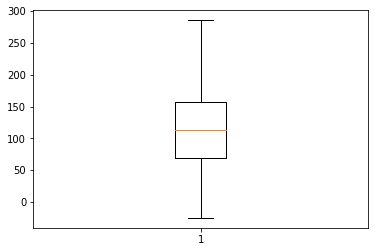

In [20]:
# Code starts here


plt.boxplot(train['attr407'])

plt.show()






# Code ends here.

### Model building

- Split the data into train and test.
- Now let's come to the actual task, predict the values of `attr1089` after building a Machine learning model.
- Try improving upon the `roc_auc_score` ([ROC-AUC Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score))

In [25]:
# Code Starts here
for cols in train:
    train[cols]=train[cols].astype(int)



In [26]:
train.head()

,attr0,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30,attr31,attr32,attr33,attr34,attr35,attr36,attr37,attr38,attr39,attr40,attr41,attr42,attr43,attr44,attr45,attr46,attr47,attr48,attr49,attr50,attr51,attr52,attr53,attr54,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,attr65,attr66,attr67,attr68,attr69,attr70,attr71,attr72,attr73,attr74,attr75,attr76,attr77,attr78,attr79,attr80,attr81,attr82,attr83,attr84,attr85,attr86,attr87,attr88,attr89,attr90,attr91,attr92,attr93,attr94,attr95,attr96,attr97,attr98,attr99,attr100,attr101,attr102,attr103,attr104,attr105,attr106,attr107,attr108,attr109,attr110,attr111,attr112,attr113,attr114,attr115,attr116,attr117,attr118,attr119,attr120,attr121,attr122,attr123,attr124,attr125,attr126,attr127,attr128,attr129,attr130,attr131,attr132,attr133,attr134,attr135,attr136,attr137,attr138,attr139,attr140,attr141,attr142,attr143,attr144,attr145,attr146,attr147,attr148,attr149,attr150,attr151,attr152,attr153,attr154,attr155,attr156,attr157,attr158,attr159,attr160,attr161,attr162,attr163,attr164,attr165,attr166,attr167,attr168,attr169,attr170,attr171,attr172,attr173,attr174,attr175,attr176,attr177,attr178,attr179,attr180,attr181,attr182,attr183,attr184,attr185,attr186,attr187,attr188,attr189,attr190,attr191,attr192,attr193,attr194,attr195,attr196,attr197,attr198,attr199,attr200,attr201,attr202,attr203,attr204,attr205,attr206,attr207,attr208,attr209,attr210,attr211,attr212,attr213,attr214,attr215,attr216,attr217,attr218,attr219,attr220,attr221,attr222,attr223,attr224,attr225,attr226,attr227,attr228,attr229,attr230,attr231,attr232,attr233,attr234,attr235,attr236,attr237,attr238,attr239,attr240,attr241,attr242,attr243,attr244,attr245,attr246,attr247,attr248,attr249,attr250,attr251,attr252,attr253,attr254,attr255,attr256,attr257,attr258,attr259,attr260,attr261,attr262,attr263,attr264,attr265,attr266,attr267,attr268,attr269,attr270,attr271,attr272,attr273,attr274,attr275,attr276,attr277,attr278,attr279,attr280,attr281,attr282,attr283,attr284,attr285,attr286,attr287,attr288,attr289,attr290,attr291,attr292,attr293,attr294,attr295,attr296,attr297,attr298,attr299,attr300,attr301,attr302,attr303,attr304,attr305,attr306,attr307,attr308,attr309,attr310,attr311,attr312,attr313,attr314,attr315,attr316,attr317,attr318,attr319,attr320,attr321,attr322,attr323,attr324,attr325,attr326,attr327,attr328,attr329,attr330,attr331,attr332,attr333,attr334,attr335,attr336,attr337,attr338,attr339,attr340,attr341,attr342,attr343,attr344,attr345,attr346,attr347,attr348,attr349,attr350,attr351,attr352,attr353,attr354,attr355,attr356,attr357,attr358,attr359,attr360,attr361,attr362,attr363,attr364,attr365,attr366,attr367,attr368,attr369,attr370,attr371,attr372,attr373,attr374,attr375,attr376,attr377,attr378,attr379,attr380,attr381,attr382,attr383,attr384,attr385,attr386,attr387,attr388,attr389,attr390,attr391,attr392,attr393,attr394,attr395,attr396,attr397,attr398,attr399,attr400,attr401,attr402,attr403,attr404,attr405,attr406,attr407,attr408,attr409,attr410,attr411,attr412,attr413,attr414,attr415,attr416,attr417,attr418,attr419,attr420,attr421,attr422,attr423,attr424,attr425,attr426,attr427,attr428,attr429,attr430,attr431,attr432,attr433,attr434,attr435,attr436,attr437,attr438,attr439,attr440,attr441,attr442,attr443,attr444,attr445,attr446,attr447,attr448,attr449,attr450,attr451,attr452,attr453,attr454,attr455,attr456,attr457,attr458,attr459,attr460,attr461,attr462,attr463,attr464,attr465,attr466,attr467,attr468,attr469,attr470,attr471,attr472,attr473,attr474,attr475,attr476,attr477,attr478,attr479,attr480,attr481,attr482,attr483,attr484,attr485,attr486,attr487,attr488,attr489,attr490,attr491,attr492,attr493,attr494,attr495,attr496,attr497,attr498,attr499,attr500,attr501,attr502,attr503,attr504,attr505,attr506,attr507,attr508,attr509,attr510,attr511,attr512,attr5

In [27]:
X= train.drop('attr1089',1)
y= train['attr1089'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

rf_clf = RandomForestClassifier(random_state=0)
parameter_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


grid_search = GridSearchCV(rf_clf, param_grid=parameter_grid )

grid_search.fit(X_train, y_train)

prediction = grid_search.predict(X_test)

score = roc_auc_score(y_test,prediction )
print(score)

0.925437659503216


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [34]:
# Code Starts here
test = pd.read_csv('test.csv')

testt = test.drop(['Id','Unnamed: 0'],1)
           
for cols in testt:
    testt[cols]=testt[cols].astype(int)

pre = grid_search.predict(testt)           

output = pd.DataFrame({'Id': test.Id, 'attr1089': pre})
output.to_csv('randomforest.csv', index=False)
output

,Id,attr1089
0,3531,0
1,3916,0
2,3065,0
3,3465,1
4,5619,0
...,...,...
1468,6249,0
1469,2158,0
1470,5428,1
1471,408,0
